In [1]:
import pandas as pd
import matplotlib.pyplot as plt

<h3> Datasets I used in this analysis are from 1212.mn and worldbank.org.
    

<h2> Questions to consider: <br />
        1. What are the relations between interest rate and inflation. <br />
        2. Under what economic state is inflation controlled by the interest rate <br />
        3. How does real-world events influence inflation, interest rate and gdp growth <br />
        4. How are USD and price of bread influenced by the real-world events <br />

In [2]:
df = pd.read_csv(r"C:\Users\Acer\OneDrive\Desktop\intro to python project\loan rate ; percent ; end of the year.csv")
df_inflation = pd.read_csv(r"C:\Users\Acer\OneDrive\Desktop\intro to python project\inflation rate ; percent ; end of the year.csv")
df_currency = pd.read_csv(r"C:\Users\Acer\OneDrive\Desktop\intro to python project\dollar-tugrug exchange rate.csv")
df_bread = pd.read_csv(r"C:\Users\Acer\OneDrive\Desktop\intro to python project\Bread price.csv")
df_gdpgrowth = pd.read_excel(r"C:\Users\Acer\Downloads\mongolia-gdp-growth-rate1.xlsx")

<h1> Interest rate

In [4]:
df_interest = df.melt(id_vars=['LOAN_RATE,','Code'], var_name='Date')

In [5]:
df_interest = df_interest[df_interest['LOAN_RATE,'] == 'Domestic currency'][['Date','value']].reset_index(drop=True)
df_interest['Date'] = pd.to_datetime(df_interest['Date'])
df_interest.reset_index(drop=True, inplace=True)
df_interest['value'] = pd.to_numeric(df_interest['value'])

<h1> Inflation 
    

In [6]:
df_inflation = df_inflation.melt(id_vars=['Statistical indicator', 'INDICATOR'], var_name='Date')

In [7]:
df_inflation['Date'] = pd.to_datetime(df_inflation['Date'])

<h1> $ to ₮ exchange rate

In [8]:
df_currency = df_currency.melt(id_vars=['Валют'], var_name='Date')


In [20]:
df_currency.replace(',','', regex=True, inplace=True)
df_currency.reset_index()

,index,Валют,Date,value
0,0,АНУ-ын доллар сарын дундаж,2004-12-01,1209.00
1,1,АНУ-ын доллар сарын дундаж,2005-12-01,1226.42
2,2,АНУ-ын доллар сарын дундаж,2006-12-01,1164.86
3,3,АНУ-ын доллар сарын дундаж,2007-12-01,1170.24
4,4,АНУ-ын доллар сарын дундаж,2008-12-01,1228.97
5,5,АНУ-ын доллар сарын дундаж,2009-12-01,1446.52
6,6,АНУ-ын доллар сарын дундаж,2010-12-01,1234.40
7,7,АНУ-ын доллар сарын дундаж,2011-12-01,1374.20
8,8,АНУ-ын доллар сарын дундаж,2012-12-01,1396.11
9,9,АНУ-ын доллар сарын дундаж,2013-12-01,1674.58


In [10]:
df_currency['Date'] = pd.to_datetime(df_currency['Date'])
df_currency['value'] = pd.to_numeric(df_currency['value'])

<h1> Bread price per unit

In [12]:
df_bread = df_bread.melt(id_vars=['Бараа, үйлчилгээ'], var_name='Date')

In [13]:
df_bread.replace(',','', regex=True, inplace=True)
df_bread['Date'] = pd.to_datetime(df_bread['Date'])
df_bread['value'] = pd.to_numeric(df_bread['value'])

<h1> Relation between inflation and interest rate </h1>

<p> 2008: Due to Great Recession and increased demand for oil from China and India, oil price increased significantly. Such events resulted in demand-pull inflation in Mongolia. <br />
<p> 2009 to 2011: Economic recovery after great recession <br />
<p> 2016: Deflation <br />
<p> 2020: Increased unemployment due to lockdowns and increased money printing due to stimulus package and unemployment. <br />
    
<p>We can see how inflation and interest rates moved in the same direction during the years that are highlighted in green. Their relationship reflects basic supply and demand principles and are positive when the economy is doing well. It also shows how inflation can be controlled by the interest rate during their positive relation <br />
    
<p>However, we can also see that when the relationship between inflation and interest rate are negative, it is usually caused by real life events that causes the economy's growth to perform poorly. <br />
    
<h2> Green: Positive relation <br />
<h2> Red: Negative relation </h2>

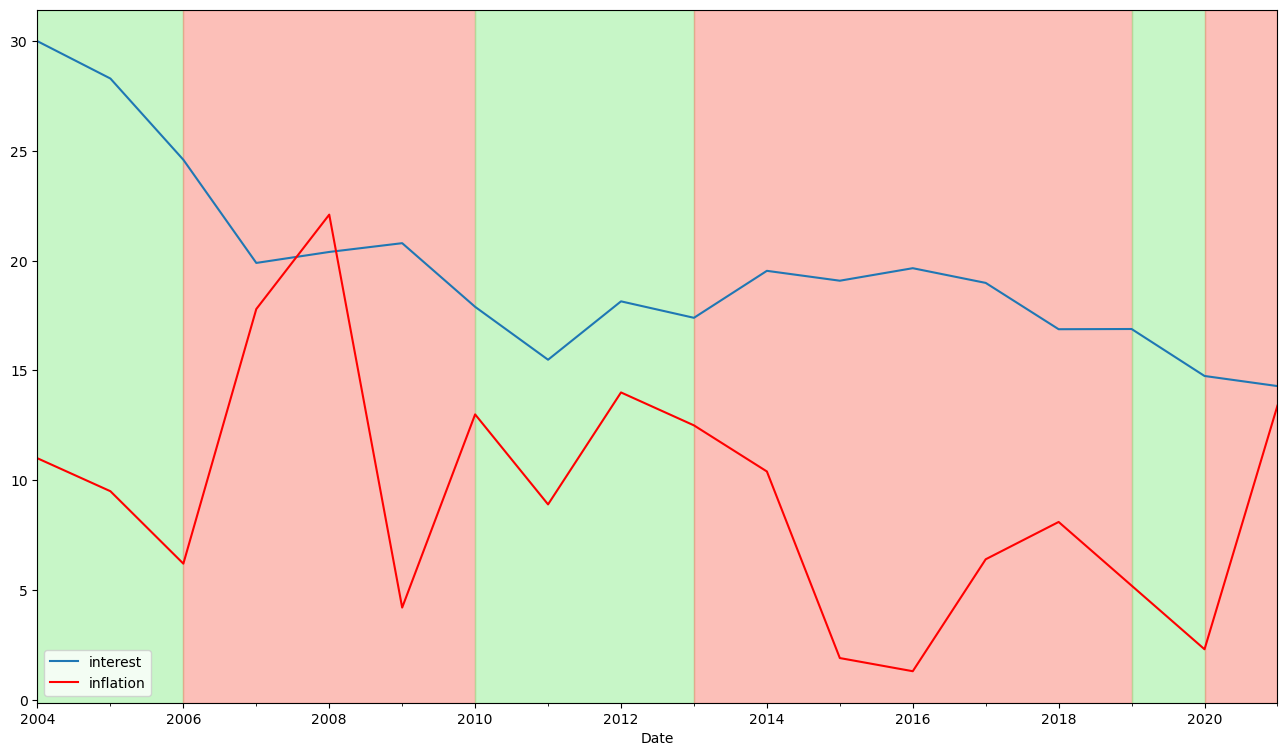

In [60]:
fig, ax = plt.subplots(figsize=(16,9))

df_interest.plot(x='Date', y='value', ax=ax, label='interest')
df_inflation.plot(x='Date', y='value', ax=ax, label='inflation', color = 'red')
#df_gdpgrowth.plot(x='date', y=' GDP Growth (%)', ax=ax, label='gdp growth', color = 'green')

ax.axvspan('2004', '2006', color='lightgreen', alpha=0.5)
ax.axvspan('2006', '2010', color='salmon', alpha=0.5)
ax.axvspan('2010', '2013', color='lightgreen', alpha=0.5)
ax.axvspan('2013', '2019', color='salmon', alpha=0.5)
ax.axvspan('2019', '2020', color='lightgreen', alpha=0.5)
ax.axvspan('2020', '2021', color='salmon', alpha=0.5)

<h1> Relations between inflation and GDP growth  </h1> 
    
<h2> One of the most debated topic regarding inflation and gdp growth is their relations. Some economist believe there is no relations at all while others believe in between either positive or negative relations. However, in the context of Mongolian economy between the years of 2004 and 2021, there is clear relations that can be observed. </h2>

<h3> In the years of 2007 and 2008, a <strong>stagflation</strong> is observed as inflation increased when gdp growth was low. </h3>

<h3> During the years of 2014 and 2016, a <strong>deflation</strong> is observed as both the inflation and gdp growth were low. </h3>

<h3> During the years of 2009 and 2011, an <strong>economy recovery</strong> is observed as gdp growth increased exponentially. </h3>

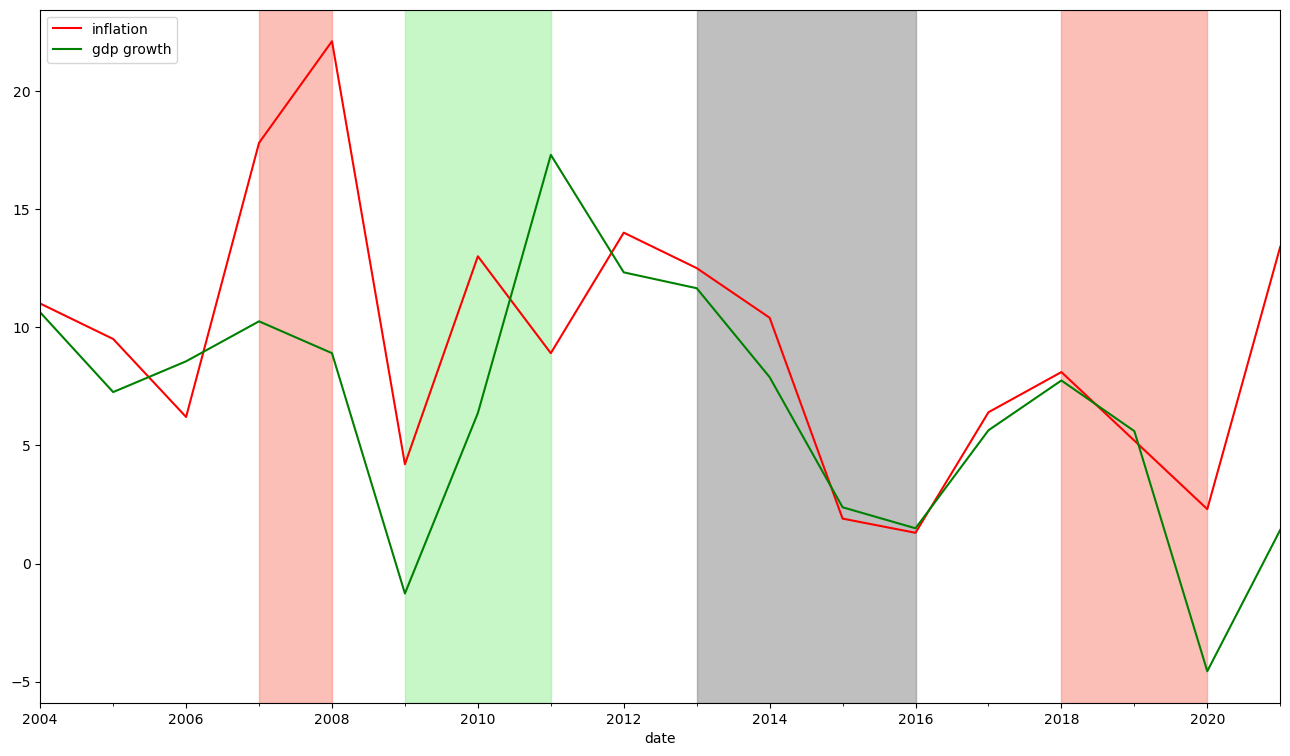

In [34]:
fig, ax = plt.subplots(figsize=(16,9))

#df_interest.plot(x='Date', y='value', ax=ax, label='interest')
df_inflation.plot(x='Date', y='value', ax=ax, label='inflation', color = 'red')
df_gdpgrowth.plot(x='date', y=' GDP Growth (%)', ax=ax, label='gdp growth', color = 'green')

ax.axvspan('2007', '2008', color='salmon', alpha=0.5)
ax.axvspan('2009', '2011', color='lightgreen', alpha=0.5)
ax.axvspan('2018', '2020', color='salmon', alpha=0.5)
ax.axvspan('2013', '2016', color='grey', alpha=0.5)

<H2> How does inflation growth influence price of bread and currency rate
    
<h2> Red highlight means when inflation rose
    
<h2> About data: Currency means 1 USD exchange rate to MNT, bread means price of atar bread per unit
    
<h2> As seen from the graph, both price of bread and inflation seem to be influenced by the inflation. Furthermore, it is difficult to say wether if inflation does impact USD exchange rate as it fluctuate regularly and does not seem to show any clear pattern. As for price of bread, it does not seem to be influenced by the inflation as heavily as USD exchange rate.<h2>
    
<h2> The relation between USD currency exchange rate and price of bread don't seem to influence each other since Mongolia produces it's own bread. 

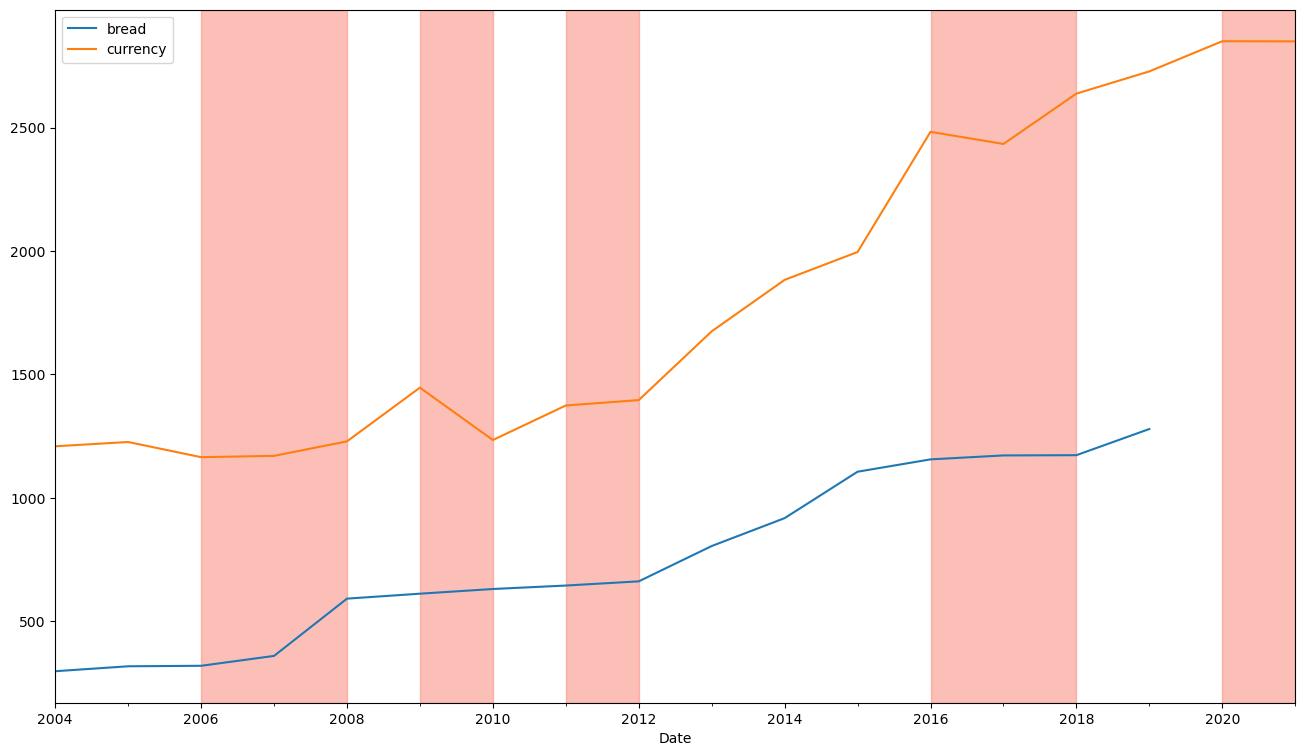

In [61]:
fig, ax = plt.subplots(figsize=(16,9))

df_bread.plot(x='Date', y='value', ax=ax, label='bread')
df_currency.plot(x='Date', y='value', ax=ax, label='currency')

ax.axvspan('2006', '2008', color='salmon', alpha=0.5)
ax.axvspan('2009', '2010', color='salmon', alpha=0.5) 
ax.axvspan('2011', '2012', color='salmon', alpha=0.5)
ax.axvspan('2016', '2018', color='salmon', alpha=0.5)
ax.axvspan('2020', '2021', color='salmon', alpha=0.5)